## Detect cycle in a directed graph 
Medium Accuracy: 27.88%Submissions: 360K+Points: 4
Get Internship at GfG by submitting your Entries in: Data Science Blogathon


Given a Directed Graph with V vertices (Numbered from 0 to V-1) and E edges, check whether it contains any cycle or not.


Example 1:

Input:
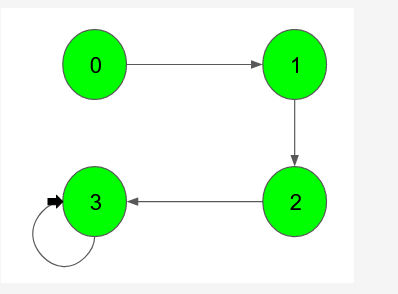

Output: 1
Explanation: 3 -> 3 is a cycle

Example 2:

>Input:
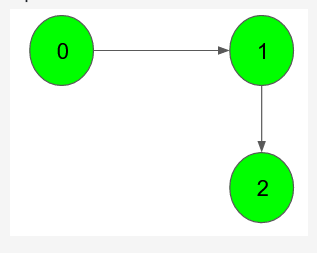


Output: 0  
Explanation: no cycle in the graph  

Your task:  
You dont need to read input or print anything. Your task is to complete the function isCyclic() which takes the integer V denoting the number of vertices and adjacency list adj as input parameters and returns a boolean value denoting if the given directed graph contains a cycle or not.  
In the adjacency list adj, element adj[i][j] represents an edge from i to j.  


Expected Time Complexity: O(V + E)
Expected Auxiliary Space: O(V)


Constraints:
1 ≤ V, E ≤ 105  


# Using DFS
#### For undirected graph  the case was that if we visit a node which was already visited then its a cycle , But this case is not the same for Directed Graph.
<b> For Directed Graph, even if we visit the same node twice, we need to check if the path followed is same or not,  </b>
##### That means it needs to either follow a clockwise or anticlockwise pattern while following through the direction of the nodes
##### Hence, for this reason  we maintain 2 array, visit and pathvisit for Directed Graph

In [3]:
# For undirected graph  the case was that if we visit a node which was already visited then its a cycle , But this case is not the same for Directed Graph.
# For Directed Graph, even if we visit the same node twice, we need to check if the path followed is same or not, 
# That means it needs to either follow a clockwise or anticlockwise pattern while following through the direction of the nodes
# Hence, for this reason  we maintain 2 array, visit and pathvisit for Directed Graph

# For undirected graph  the case was that if we visit a node which was already visited then its a cycle , But this case is not the same for Directed Graph.
# For Directed Graph, even if we visit the same node twice, we need to check if the path followed is same or not, 
# That means it needs to either follow a clockwise or anticlockwise pattern while following through the direction of the nodes
# Hence, for this reason  we maintain 2 array, visit and pathvisit for Directed Graph
from typing import List

class Solution:
    def isCyclic(self, V : int , adj : List[List[int]]) -> bool :
        
        def dfscheck(graph, node, visit, pathvis):
            visit[node] = 1         # Mark visit
            pathvis[node] = 1       # and Mark pathVis for node
            
            for child in graph[node]:    # traverse through children, if not visited
                if visit[child] == 0:     
                   if dfscheck(graph, child, visit, pathvis):     # if this dfs check returns True{through else part} for a cylce, 
                       return True                                  # then there is cycle
                else:
                    if pathvis[child] == 1:         # so when dfs traversal visits a visited node, it comes to this step and 
                           return True               # sees path vis is True, so it returns True that cycle exists 
                                                       # ie. we have visited a already visited node in same path
                        
            pathvis[node] = 0   # Then after backtracking on recursion stack we set the path visit back to 0 { you know this
            return False                    # traversal is only for one node and we visited many nodes already
            

        
        n = len(adj)
        visit = [0]* len(adj)
        pathvis = [0]* len(adj)
        
        for i in range(n):
            if not visit[i]:
                if dfscheck(adj, i, visit, pathvis):
                    return True